<a href="https://colab.research.google.com/github/reignerlastimosa/Sentiment_Analysis/blob/main/Capstone_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import re
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt

In [ ]:
import nltk
nltk.download('vader_lexicon')
tokenizer = RegexpTokenizer(r'\w+')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
dataset = pd.read_excel('integrated.xlsx')
dataset

,username,date,product,rating,feedback_auto,feedback
0,paje.ph,2022-02-17 16:19:00,aquaspeed aquarium heater 25w 50w 100w 200w 300w,1.0,Damaged / Defective item,DEFFECTIVE ITEM/ SELLER NOT PROFESSIONAL\nWron...
1,kyliegriego,2022-02-11 09:05:00,aquarium airpump connector controller,1.0,NaN,Walang dumating na gantong item
2,salvatierraaldrin,2022-02-09 13:08:00,"co2 diffuser set (checkvalve, ushape, diffuser...",1.0,Damaged / Defective item,NaN
3,salvatierraaldrin,2022-02-09 13:08:00,aquarium acrylic holder 4pcs accessories 6mm,1.0,NaN,NaN
4,salvatierraaldrin,2022-02-09 13:08:00,spirulina tablet 50pcs,1.0,NaN,.wlang nalabas n CO2... buti pa yung ginawa ko...
...,...,...,...,...,...,...
5056,crimsonqn,2021-11-08 17:26:00,sunsun aquarium cleaning set 5 in 1 sx-05,5.0,Well-packaged,It’s been my second time ordering at this shop...
5057,neiljohnmanansala,2021-12-14 10:22:00,sunsun aquarium cleaning set 5 in 1 sx-05,5.0,Excellent quality,NaN
5058,totskie17,2021-11-07 10:25:00,sunsun aquarium cleaning set 5 in 1 sx-05,5.0,Excellent quality,NaN
5059,hsiehchung18,2021-10-11 20:03:00,sunsun aquarium cleaning set 5 in 1 sx-05,5.0,Well-packaged,NaN


# Cleaning


In [ ]:
dataset.info

<bound method DataFrame.info of                username                date  \
0               paje.ph 2022-02-17 16:19:00   
1           kyliegriego 2022-02-11 09:05:00   
2     salvatierraaldrin 2022-02-09 13:08:00   
3     salvatierraaldrin 2022-02-09 13:08:00   
4     salvatierraaldrin 2022-02-09 13:08:00   
...                 ...                 ...   
5056          crimsonqn 2021-11-08 17:26:00   
5057  neiljohnmanansala 2021-12-14 10:22:00   
5058          totskie17 2021-11-07 10:25:00   
5059       hsiehchung18 2021-10-11 20:03:00   
5060            s*****4 2021-09-03 12:49:00   

                                                product  rating  \
0      aquaspeed aquarium heater 25w 50w 100w 200w 300w     1.0   
1                 aquarium airpump connector controller     1.0   
2     co2 diffuser set (checkvalve, ushape, diffuser...     1.0   
3          aquarium acrylic holder 4pcs accessories 6mm     1.0   
4                                spirulina tablet 50pcs     1.0   
.

In [ ]:
dataset.isnull().sum()

username            3
date                3
product             2
rating              2
feedback_auto    2524
feedback         2072
dtype: int64

In [ ]:
dataset['feedback'] = dataset['feedback'].fillna(0)

for i in range(len(dataset)):    
    if dataset.loc[i,'feedback'] == 0:
        dataset.loc[i,'feedback'] = dataset.loc[i,'feedback_auto']

In [ ]:
dataset.isnull().sum()

username            3
date                3
product             2
rating              2
feedback_auto    2524
feedback          817
dtype: int64

In [ ]:
dataset.dropna(subset = ["feedback"], inplace =True )
dataset.dropna(subset = ["username"], inplace =True )
dataset.dropna(subset = ["date"], inplace =True )

In [ ]:
dataset.isna().sum()


username            0
date                0
product             0
rating              0
feedback_auto    1707
feedback            0
dtype: int64

In [ ]:
dataset.dropna(subset = ["username"], inplace =True )
dataset.dropna(subset = ["date"], inplace =True )

In [ ]:
dataset.duplicated().sum()

137

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset['date'] = dataset['date'].dt.strftime('%m/%d/%Y')

C:\Users\user\AppData\Local\Temp\ipykernel_5392\2107347625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset['date'].dt.strftime('%m/%d/%Y')


In [ ]:
del dataset['feedback_auto']

In [ ]:
del dataset['username']

In [ ]:
del dataset['rating']


In [ ]:
dataset

,date,product,feedback
0,02/17/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,DEFFECTIVE ITEM/ SELLER NOT PROFESSIONAL\nWron...
1,02/11/2022,aquarium airpump connector controller,Walang dumating na gantong item
2,02/09/2022,"co2 diffuser set (checkvalve, ushape, diffuser...",Damaged / Defective item
4,02/09/2022,spirulina tablet 50pcs,.wlang nalabas n CO2... buti pa yung ginawa ko...
5,02/07/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,Basag poyung dumating tsaka aquaspeed po order...
...,...,...,...
5055,04/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,All goods item Well packed Mabilis mag ship ka...
5056,11/08/2021,sunsun aquarium cleaning set 5 in 1 sx-05,It’s been my second time ordering at this shop...
5057,12/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,Excellent quality
5058,11/07/2021,sunsun aquarium cleaning set 5 in 1 sx-05,Excellent quality


# NLP


In [ ]:
taglish_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dun","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","makita","marapat","masyado","may", "ma","mayroon","mga","minsan","mismo","po","mula", "naten","tapos", "basta","sya","mo","nyo","muli","na","nabanggit","naging","nagkaroon","nais","nakita","naka","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon", "pag","yan","sayo","nka","nyang","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","rin","kya","gnun","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","talaga","tagalang","tlga","tlgang", "nitong","tayo","tulad","tungkol", "tsaka", "nasa", "daw","una", "nlng", "lng", "me", "naman","nmn", "namang", "si", "man","nman", "mag","mejo", "medyo","yung","ung", "nalang","nd","i","nag","mm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "also","below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "nor", "own", "same", "so", "than", "too", "very",  "can", "will", "just", "don", "should", "now","a","b","c","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')


In [ ]:
def getCleanText(text):

    #converting to small letters
    text = text.lower()

    
    #remove numbers
    text = re.sub(r'[0-9]+','',text)
   
    #tokenize
    tokens = tokenizer.tokenize(text)
   
    #stopwords
    new_tokens = [token for token in tokens if token not in taglish_stopwords]
    
   
    clean_text = " ".join(new_tokens)
    return clean_text

In [ ]:
clean_data = [getCleanText(i) for i in dataset['feedback']]
clean_data

['deffective item seller not professional wrong move dami palang bad reviews shop nato diko nabasa lesson learned review muna shop item buyyout',
 'walang dumating gantong item',
 'damaged defective item',
 'wlang nalabas co buti diy diffuser',
 'basag poyung dumating aquaspeed order ibang brand dumating',
 'pangit nung parts nadumating sira',
 'kulang dinidikit',
 'tagal ship dumating',
 'ordered pcs dumating chatted seller yesterday send stone crack immedietly held see vid seller doesn response yet incident got dissapointed',
 'scam inorder inch quantity dumating sakin inch lang',
 'uses ayaw gumana',
 'bat powder binigay',
 'not receive item',
 'damaged defective item',
 'disappointed hindi dumating white sand worth only received dragon stone imagine almost half binayaran hindi dumating scam',
 'damaged defective item',
 'di dumidikit',
 'tagal dumating blame courier seller nagpapasko requested refund tagal seller di lang update',
 'delayed delivery',
 'walang kwentang seller walang

In [ ]:
from nltk.probability import FreqDist

In [ ]:
dataset['feedback'] = clean_data


C:\Users\user\AppData\Local\Temp\ipykernel_5392\3444145888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['feedback'] = clean_data


In [ ]:

dataset

,date,product,feedback
0,02/17/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...
1,02/11/2022,aquarium airpump connector controller,walang dumating gantong item
2,02/09/2022,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item
4,02/09/2022,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser
5,02/07/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...
...,...,...,...
5055,04/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...
5056,11/08/2021,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...
5057,12/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality
5058,11/07/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality


# Sentiment Scoring for Labels

In [ ]:
sia = SentimentIntensityAnalyzer()
new_words = {
    'not': -2.0,'die':-3.0,'died':-3.0,'dead':-3.0,'insect':-2.0,'break':-2.0,'broke':-2.0,'broken':-2.0,'disappoint':-2.0,'disappointing':-2.0,'disappointed':-3.0,'disappointment':-2.0,'crack':-2.0,'cracked':-2.0,'melt':-2.0, 'stain':-1.0,'stains':-1.0,'long': -1.0, 'short': -1.0,'different':-1.0,'late': -2.0,'smashed': -2.0, 'small':-0.5,'deformed':-2.0,'thin':-1.0,'deform':-2.0,'unresponsive':-2.0,'unattached':-0.5, 'reused':-3.0,'slimmy':-0.5,'panget': -2.0, 'missing':-1.0,'pangit' : -2.0, 'rupok': -2.0, 'marupok': -2.0,'sira': -2.0, 'nasira': -2.0, 'kuripot': -2.0, 'warak': -3.0, 'wasak': -3.0, 'ayaw': -1.0,'di': -1.0, 'd':-1.0,'hindi': -1.0,'tagal': -3.0,'katagal':-2.0,'matagal': -3.0, 'mtgl': -3.0, 'mtgal': -3.0, 'natagalan': -3.0,'basag': -2.0, 'nabasag': -3.0, 'patay':-2.0, 'namatay': -2.0,'nakakadismaya': -3.0, 'madismaya':-3.0,'nadismaya':-3.0,'sabog': -2.0, 'sumabog': -2.0,'butas':-2.0, 'pisti': -2.0, 'putik':-1.0,'haist': -1.0, 'hays': -1.0,'yupi': -2.0, 'nayupi': -2.0, 'lusaw' : -2.0, 'tunaw': -2.0, 'natunaw' : -2.0,'bali' :-1.0, 'nabali': -2.0,'tamad': -2.0,'kulang': -2.0,'mali': -1.0, 'durog': -2.0, 'durug': -1.0, 'wag': -1.0, 'huwag': -1.0,'sayang': -2.0, 'hirap': -1.0, 'maling': -1.0,'pakaliit': -1.0, 'napakaliit':-1.0,'maliit': -1.0,'liit': -1.0,
     'nagcancel':-1.0, 'budol':-2.0, 'iba': -0.5, 'magkaiba': -0.5, 'ibang': -0.5, 'tinipid' : -2.0, 'bagal': -2.0, 'mabagal': -2.0, 'mahina': -1.0, 'hina': -1.0, 'tapon': -2.0, 'natapon': -2.0, 'tinatapon':-1.3,'tumapon':-2.0, 'natatapon':-2.0,'madumi' :-2.0, 'marumi': -2.0, 'brown': -1.0, 'nipis': -2.0, 'manipis': -2.0, 'ninipis': -2.0,'overprice':-1.0, 'overpriced': -1.0, 'kainis': -1.0, 'nakakainis': -1.0, 'only': -0.5, 'putik':-1.0, 'lang': -1.0, 'lng': -0.5, 'tumagas':-2.0, 'barado': -1.0, 'biyak':-2.0, 'nadelay': -2.0, 'maluwag':-1.0, 'maluwang':-1.0, 'luwag': -1.0, 'luwang': -1.0,'nagkalat': -0.5, 'kumalat':-0.5, 'kalat':-0.5, 'kaunti':-1.0, 'konti':-1.0,'kunti':-1.0, 'onti':-1.0, 'onte': -1.0, 'kunting':-1.0,'layo': -0.5, 'malayo': -0.5, 'ingay': -1.0, 'maingay': -1.0, 'walang': -1.0, 'wala':1.0,'wlang':-1.0, 'walng': -1.0,'wlng':-1.0, 'legit':1.0, 'appreciate':1.0, 'wrong':-2.0, 'defective':-2.5, 'leakk' :-2.0, 'punit':-2.0, 'punet':-2.0, 'anliit':-1.0, 'nagkalat':-2.0, 'recommended':1.3, 'leakkk':-2.0, 'legit':1.3, 'gooodsssss' :1.3, 'thankyou':1.3, 'verygood':2.0, 'legittt':1.3,
    'maganda': 1.35, 'ganda':1.35, 'gandaa':1.35,'gaganda':1.35, 'maganada':1.35,'magandaa':1.35, 'well':1.35,'well packaged':1.35, 'wellpackaged':1.0,'mabilis':2.0, 'bilis':2.0, 'matibay':2.0, 'tibay': 2.0, 'maayos':1.0, 'ayos':1.0, 'mabait':2.0,'bait':2.0,'magalang':2.0,'galang':2.0, 'salamat':1.35,'thanks':1.3, 'thank':1.35,'thank you':1.0, 'misleading':-2.5, 'didnt' :-1.0, 'didn':-1.0,'picture':-1.0, 'pictures':-1.0,'nakakadisappoint':-2.0, 'disppointed':-2.0, 'incomplete':-2.5, 'responsive':0.2, 'good':1.5, 'maliliit':-1.0, 'immediately':1.35, 'sulit':1.35, 'fast':1.35, 'po':0.0, 'tnx':1.35, 'quick':1.35,'quickly':1.35, 'kaso':-1.0, 'accommodating':1.3, 'little':-1.0, 'slow':-2.0, 'high':1.25, 'delayed':-2.0, 'perfect':2.5, 'nagtagal':-2.0, 'highly':2.0, 'tahimik':1.0, 'earlier':1.2, 'goods':1.3, 'improve':-0.5, 'high':1.3, 'daga':-2.0, 'early':1.0, 'problema':-1.5, 'tagaaaaaaal' :-2.0, 'tuwa':1.3, 'gooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooods' :1.3, 'gooooooood':1.3, 'thankx':1.3, 'happpyyyy':1.3, 'dabest':1.3, 'gooods':1.3, 'agad':1.0, 'low':0.0, 'price':0.0,
}

sia.lexicon.update(new_words)

In [ ]:
dataset['negative'] = dataset['feedback'].apply(lambda x:sia.polarity_scores(x)['neg'])
dataset['neutral'] = dataset['feedback'].apply(lambda x:sia.polarity_scores(x)['neu'])
dataset['positive'] = dataset['feedback'].apply(lambda x:sia.polarity_scores(x)['pos'])
dataset['total'] = dataset['feedback'].apply(lambda x:sia.polarity_scores(x)['compound'])

C:\Users\user\AppData\Local\Temp\ipykernel_5392\1658953653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['negative'] = dataset['feedback'].apply(lambda x:sia.polarity_scores(x)['neg'])
C:\Users\user\AppData\Local\Temp\ipykernel_5392\1658953653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['neutral'] = dataset['feedback'].apply(lambda x:sia.polarity_scores(x)['neu'])
C:\Users\user\AppData\Local\Temp\ipykernel_5392\1658953653.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
dataset.head()

,date,product,feedback,negative,neutral,positive,total
0,02/17/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,0.333,0.667,0.0,-0.8591
1,02/11/2022,aquarium airpump connector controller,walang dumating gantong item,0.400,0.600,0.0,-0.2500
2,02/09/2022,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,0.865,0.135,0.0,-0.7506
4,02/09/2022,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,0.286,0.714,0.0,-0.2500
5,02/07/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,0.429,0.571,0.0,-0.5423


In [ ]:
label = []
for i in dataset['total']:
    if i > 0.3:
        label.append('Positive')
    elif i < 0.00:
        label.append('Negative')
    else:
        label.append('Neutral')

In [ ]:
dataset['label'] = label
dataset

C:\Users\user\AppData\Local\Temp\ipykernel_5392\3714515982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label'] = label


,date,product,feedback,negative,neutral,positive,total,label
0,02/17/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,0.333,0.667,0.000,-0.8591,Negative
1,02/11/2022,aquarium airpump connector controller,walang dumating gantong item,0.400,0.600,0.000,-0.2500,Negative
2,02/09/2022,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,0.865,0.135,0.000,-0.7506,Negative
4,02/09/2022,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,0.286,0.714,0.000,-0.2500,Negative
5,02/07/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,0.429,0.571,0.000,-0.5423,Negative
...,...,...,...,...,...,...,...,...
5055,04/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...,0.000,0.455,0.545,0.8750,Positive
5056,11/08/2021,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...,0.218,0.403,0.379,0.4588,Positive
5057,12/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,0.000,0.213,0.787,0.5719,Positive
5058,11/07/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,0.000,0.213,0.787,0.5719,Positive


In [ ]:
dataset.reset_index(inplace = False)

,index,date,product,feedback,negative,neutral,positive,total,label
0,0,02/17/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,0.333,0.667,0.000,-0.8591,Negative
1,1,02/11/2022,aquarium airpump connector controller,walang dumating gantong item,0.400,0.600,0.000,-0.2500,Negative
2,2,02/09/2022,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,0.865,0.135,0.000,-0.7506,Negative
3,4,02/09/2022,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,0.286,0.714,0.000,-0.2500,Negative
4,5,02/07/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,0.429,0.571,0.000,-0.5423,Negative
...,...,...,...,...,...,...,...,...,...
4099,5055,04/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...,0.000,0.455,0.545,0.8750,Positive
4100,5056,11/08/2021,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...,0.218,0.403,0.379,0.4588,Positive
4101,5057,12/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,0.000,0.213,0.787,0.5719,Positive
4102,5058,11/07/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,0.000,0.213,0.787,0.5719,Positive


In [ ]:
dataset

,date,product,feedback,negative,neutral,positive,total,label
0,02/17/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,0.333,0.667,0.000,-0.8591,Negative
1,02/11/2022,aquarium airpump connector controller,walang dumating gantong item,0.400,0.600,0.000,-0.2500,Negative
2,02/09/2022,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,0.865,0.135,0.000,-0.7506,Negative
4,02/09/2022,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,0.286,0.714,0.000,-0.2500,Negative
5,02/07/2022,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,0.429,0.571,0.000,-0.5423,Negative
...,...,...,...,...,...,...,...,...
5055,04/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...,0.000,0.455,0.545,0.8750,Positive
5056,11/08/2021,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...,0.218,0.403,0.379,0.4588,Positive
5057,12/14/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,0.000,0.213,0.787,0.5719,Positive
5058,11/07/2021,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,0.000,0.213,0.787,0.5719,Positive


In [ ]:
dataset.to_excel("testNeutral.xlsx", index=False)

In [ ]:
del dataset['negative']
del dataset['neutral']
del dataset['positive']
del dataset['total']

In [ ]:
dataset.to_excel("feedback.xlsx", index = False)

# Transforming product table

In [ ]:
product_dataset=pd.read_excel('feedback.xlsx',usecols=['product','feedback','label'])
product_dataset

,product,feedback,label
0,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,Negative
1,aquarium airpump connector controller,walang dumating gantong item,Negative
2,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,Negative
3,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,Negative
4,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,Negative
...,...,...,...
4099,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...,Positive
4100,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...,Positive
4101,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,Positive
4102,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,Positive


In [ ]:
print(product_dataset['product'].unique())

['aquaspeed aquarium heater 25w 50w 100w 200w 300w'
 'aquarium airpump connector controller'
 'co2 diffuser set (checkvalve, ushape, diffuser, suction cup)'
 'spirulina tablet 50pcs'
 'dragon stone black seiryu stone ryou stone crushed dragon stone sold per kilo'
 'infinity aquarium top filter overhead filter r8880 8w, r8881 10w, r8882 20w, r8883 30w, r8884 40w'
 'aquarium background sticker oyama 24" height sold per ft'
 'infinity mini siphon pump'
 'fish food flakes 25grams and floating pellet red green 60grams'
 'White sand for aquarium aquascape'
 'top filter overhead spare hose 2ft length random color blue and black'
 'aquarium gel type glue instant gel gou elephant 5g super glue'
 'infinity slim external hang on filter cs48 cs35 cs25'
 'Diy co2 cap (1piece)' 'aquarium tweezer (27cm&48cm)(curved&straight)'
 'airstone cylinder big round 1inch 2.5inch air stone'
 'filter wool 1pc makapal washable' 'Aquarium Digital Thermometer'
 'aquaspeed submersible pump a5000 a6500e a6000'
 'aqua

In [ ]:
product_dataset['product'].nunique()

288

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
label_encoder= LabelEncoder()  
product_dataset['label'] = label_encoder.fit_transform(product_dataset['label'])
product_dataset

,product,feedback,label
0,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,0
1,aquarium airpump connector controller,walang dumating gantong item,0
2,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,0
3,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,0
4,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,0
...,...,...,...
4099,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...,2
4100,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...,2
4101,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,2
4102,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,2


In [ ]:
enc = OneHotEncoder()
enc_df  = pd.DataFrame(enc.fit_transform(product_dataset[['label']]).toarray())
product_dataset =product_dataset.join(enc_df)
del product_dataset['label']
product_dataset.columns = ['product','feedback_amount','negative_amount','neutral_amount','positive_amount']


data_types_dict = {'negative_amount': int, 'neutral_amount': int, 'positive_amount':int}
product_dataset = product_dataset.astype(data_types_dict)
product_dataset['negative_amount'] = product_dataset['negative_amount'].replace(0,np.nan)
product_dataset['neutral_amount'] = product_dataset['neutral_amount'].replace(0,np.nan)
product_dataset['positive_amount'] = product_dataset['positive_amount'].replace(0,np.nan)
product_dataset

,product,feedback_amount,negative_amount,neutral_amount,positive_amount
0,aquaspeed aquarium heater 25w 50w 100w 200w 300w,deffective item seller not professional wrong ...,1.0,NaN,NaN
1,aquarium airpump connector controller,walang dumating gantong item,1.0,NaN,NaN
2,"co2 diffuser set (checkvalve, ushape, diffuser...",damaged defective item,1.0,NaN,NaN
3,spirulina tablet 50pcs,wlang nalabas co buti diy diffuser,1.0,NaN,NaN
4,aquaspeed aquarium heater 25w 50w 100w 200w 300w,basag poyung dumating aquaspeed order ibang br...,1.0,NaN,NaN
...,...,...,...,...,...
4099,sunsun aquarium cleaning set 5 in 1 sx-05,goods item well packed mabilis ship dumating a...,NaN,NaN,1.0
4100,sunsun aquarium cleaning set 5 in 1 sx-05,second time ordering shop packed well items no...,NaN,NaN,1.0
4101,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,NaN,NaN,1.0
4102,sunsun aquarium cleaning set 5 in 1 sx-05,excellent quality,NaN,NaN,1.0


In [ ]:
product_dataset = product_dataset.groupby(['product']).count()
product_dataset

,feedback_amount,negative_amount,neutral_amount,positive_amount
product,,,,
1.3 Meter Aquarium Siphon with Valve Fish Tank Vacuum Gravel Cleaner,2,0,0,2
Air pump hose for aquarium,2,1,1,0
Air pump hose silicon for aquarium,11,6,2,3
Althernanthera reineckii rosanervig,1,1,0,0
Althernanthera reineckii rosenaverg,1,0,0,1
...,...,...,...,...
wave maker for aquarium aquaspeed brand (a100m -6w) and (a300m-15w),5,0,2,3
winner aeolus airpump,2,0,0,2
x3 aquarium light 6watts,15,3,2,11


In [ ]:
product_dataset.to_excel("product.xlsx")

# Getting word frequency

In [ ]:
neutral= dataset['label'].value_counts()['Neutral']
negative= dataset['label'].value_counts()['Negative']
positive= dataset['label'].value_counts()['Positive']

In [ ]:
neutral

516

In [ ]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]
    print(words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [ ]:
generate_N_grams("hello i am reigner")

['hello', 'i', 'am', 'reigner']


['hello', 'i', 'am', 'reigner']

In [ ]:
from collections import defaultdict

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [ ]:
for text in dataset[dataset.label=='Positive'].feedback:
    for word in generate_N_grams(text):
        positiveValues[word]+=1
        
positiveValues

['wala', 'parcel', 'huhu', 'eto', 'need', 'iisa', 'lang', 'order', 'hahaha', 'uki', 'ukishshsjsjjsbsbsbshjwjwjwjsjsjsjssjjdjdndndnxnxnxndbdbdsbsbsbsbsbsbdbdbdbdbdbdbxbxbxbbxbxbxbxbxbxbdb']
['di', 'sure', 'legit', 'un', 'items', 'kc', 'd', 'maayos', 'packaging']
['hahaha', 'maybe', 'only', 'used', 'nice']
['plant', 'stored', 'plastic', 'bag', 'without', 'air', 'inside', 'plastic', 'container', 'plant', 'arrived', 'leaves', 'already', 'unattached', 'slimmy', 'thank', 'plant', 'though', 'planted', 'roots', 'hoped', 'grow', 'again']
['ok', 'item', 'no', 'leak', 'no', 'crack', 'itry', 'sna', 'effective', 'looking', 'forward', 'bbli', 'pko', 'kpg', 'effective', 'un', 'exp', 'disat', 'delivery', 'dhl', 'sobrang', 'tgal', 'nnsa', 'hub', 'linggo', 'nsa', 'hub', 'mlpt', 'sken', 'd', 'dndeliver', 'anyway', 'slamat', 'seller', 'sna', 'effective', 'bbli', 'marami', 'ever']
['good', 'packaging', 'safe', 'good', 'condition', 'dumating', 'items', 'wala', 'order', 'maybe', 'nkalimutan', 'osmocote', 'ca

['nice', 'item', 'ganda']
['super', 'bilis', 'dumating', 'sakto', 'salamat']
['thank', 'much']
['tnx', 'much']
['tnx']
['fast', 'delivery']
['excellent', 'quality', 'accommodating', 'seller', 'well', 'packaged', 'item', 'shipped', 'immediately']
['sulit']
['fast', 'shipping', 'good', 'packaging']
['happy', 'purchase', 'thank', 'seller']
['secured', 'packaging', 'arrived', 'intact']
['nice', 'quality']
['well', 'packed', 'fast', 'delivery', 'legit']
['mabilis', 'dumating', 'goods', 'yong', 'item']
['maganda', 'super', 'safe', 'kasi', 'sobrang', 'balot', 'bilis', 'den', 'shipping', 'dilivery', 'nya', 'grabe', 'ganda', 'mauulit', 'oksss', 'gooooodddd']
['super', 'liwanag', 'white', 'effective', 'order', 'again', 'order', 'again', 'order', 'againwill', 'order', 'againwill', 'order', 'again']
['product', 'arrived', 'quickly', 'packaged', 'nicely', 'huge', 'thanks', 'seller', 'worry', 'free', 'order', 'order', 'again', 'recommend']
['product', 'delivered', 'safe', 'no', 'damages', 'magandaa'

defaultdict(int,
            {'wala': 41,
             'parcel': 21,
             'huhu': 1,
             'eto': 5,
             'need': 18,
             'iisa': 1,
             'lang': 106,
             'order': 769,
             'hahaha': 25,
             'uki': 1,
             'ukishshsjsjjsbsbsbshjwjwjwjsjsjsjssjjdjdndndnxnxnxndbdbdsbsbsbsbsbsbdbdbdbdbdbdbxbxbxbbxbxbxbxbxbxbdb': 1,
             'di': 49,
             'sure': 22,
             'legit': 57,
             'un': 10,
             'items': 268,
             'kc': 6,
             'd': 18,
             'maayos': 104,
             'packaging': 197,
             'maybe': 5,
             'only': 5,
             'used': 14,
             'nice': 155,
             'plant': 15,
             'stored': 1,
             'plastic': 10,
             'bag': 7,
             'without': 15,
             'air': 5,
             'inside': 4,
             'container': 4,
             'arrived': 68,
             'leaves': 5,
             'already

In [ ]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_positive


,0,1
0,seller,1145
1,quality,1049
2,well,925
3,excellent,779
4,order,769
...,...,...
2453,level,1
2454,jeneca,1
2455,skimmer,1
2456,nitpick,1


In [ ]:
df_positive.to_excel("frequent_positive_unigram.xlsx", index=False)

In [ ]:
for text in dataset[dataset.label=='Negative'].feedback:
    for word in generate_N_grams(text):
        negativeValues[word]+=1
        
negativeValues

['deffective', 'item', 'seller', 'not', 'professional', 'wrong', 'move', 'dami', 'palang', 'bad', 'reviews', 'shop', 'nato', 'diko', 'nabasa', 'lesson', 'learned', 'review', 'muna', 'shop', 'item', 'buyyout']
['walang', 'dumating', 'gantong', 'item']
['damaged', 'defective', 'item']
['wlang', 'nalabas', 'co', 'buti', 'diy', 'diffuser']
['basag', 'poyung', 'dumating', 'aquaspeed', 'order', 'ibang', 'brand', 'dumating']
['pangit', 'nung', 'parts', 'nadumating', 'sira']
['kulang', 'dinidikit']
['tagal', 'ship', 'dumating']
['ordered', 'pcs', 'dumating', 'chatted', 'seller', 'yesterday', 'send', 'stone', 'crack', 'immedietly', 'held', 'see', 'vid', 'seller', 'doesn', 'response', 'yet', 'incident', 'got', 'dissapointed']
['scam', 'inorder', 'inch', 'quantity', 'dumating', 'sakin', 'inch', 'lang']
['uses', 'ayaw', 'gumana']
['not', 'receive', 'item']
['damaged', 'defective', 'item']
['disappointed', 'hindi', 'dumating', 'white', 'sand', 'worth', 'only', 'received', 'dragon', 'stone', 'imagin

defaultdict(int,
            {'deffective': 1,
             'item': 217,
             'seller': 232,
             'not': 143,
             'professional': 1,
             'wrong': 13,
             'move': 1,
             'dami': 4,
             'palang': 1,
             'bad': 19,
             'reviews': 1,
             'shop': 20,
             'nato': 2,
             'diko': 3,
             'nabasa': 4,
             'lesson': 2,
             'learned': 2,
             'review': 4,
             'muna': 10,
             'buyyout': 1,
             'walang': 40,
             'dumating': 95,
             'gantong': 1,
             'damaged': 74,
             'defective': 57,
             'wlang': 3,
             'nalabas': 1,
             'co': 5,
             'buti': 30,
             'diy': 5,
             'diffuser': 3,
             'basag': 34,
             'poyung': 1,
             'aquaspeed': 3,
             'order': 114,
             'ibang': 41,
             'brand': 6,
           

In [ ]:
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_negative


,0,1
0,lang,241
1,seller,232
2,item,217
3,not,143
4,order,114
...,...,...
2030,namomonitor,1
2031,tiglamig,1
2032,naiipit,1
2033,nevertheless,1


In [ ]:
df_negative.to_excel("frequent_negative_unigram.xlsx", index=False)

In [ ]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

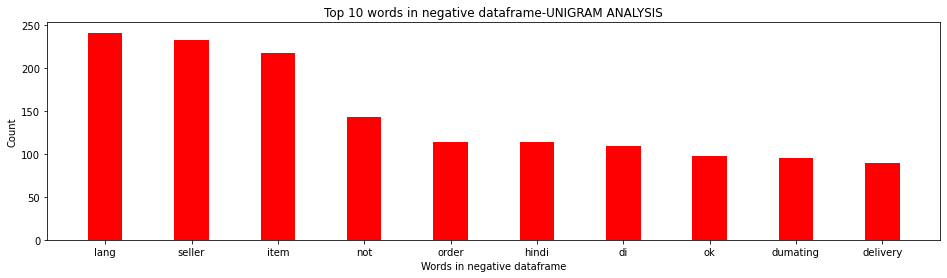

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)


In [ ]:
for text in dataset[dataset.label=='Positive'].feedback:
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1

['wala', 'parcel', 'huhu', 'eto', 'need', 'iisa', 'lang', 'order', 'hahaha', 'uki', 'ukishshsjsjjsbsbsbshjwjwjwjsjsjsjssjjdjdndndnxnxnxndbdbdsbsbsbsbsbsbdbdbdbdbdbdbxbxbxbbxbxbxbxbxbxbdb']
['di', 'sure', 'legit', 'un', 'items', 'kc', 'd', 'maayos', 'packaging']
['hahaha', 'maybe', 'only', 'used', 'nice']
['plant', 'stored', 'plastic', 'bag', 'without', 'air', 'inside', 'plastic', 'container', 'plant', 'arrived', 'leaves', 'already', 'unattached', 'slimmy', 'thank', 'plant', 'though', 'planted', 'roots', 'hoped', 'grow', 'again']
['ok', 'item', 'no', 'leak', 'no', 'crack', 'itry', 'sna', 'effective', 'looking', 'forward', 'bbli', 'pko', 'kpg', 'effective', 'un', 'exp', 'disat', 'delivery', 'dhl', 'sobrang', 'tgal', 'nnsa', 'hub', 'linggo', 'nsa', 'hub', 'mlpt', 'sken', 'd', 'dndeliver', 'anyway', 'slamat', 'seller', 'sna', 'effective', 'bbli', 'marami', 'ever']
['good', 'packaging', 'safe', 'good', 'condition', 'dumating', 'items', 'wala', 'order', 'maybe', 'nkalimutan', 'osmocote', 'ca

['packed', 'properly', 'received', 'item', 'time', 'good', 'quality', 'use', 'aquarium', 'definitely', 'order', 'again']
['love', 'design', 'thermometer', 'nakukuha', 'maayos', 'temperature', 'aquarium', 'water', 'nilagay', 'lang', 'siys', 'upper', 'right', 'corner', 'aquarium', 'thanks', 'hindi', 'tall', 'magtetake', 'vertical', 'space', 'aquaium']
['okay', 'turkey', 'baster', 'salamat', 'seller', 'udbdbdhjsndkosmshxndhdjsksmombfbdjdndbdkdmbfnfjcjcbcjfjfdncmckmcjjfj']
['item', 'received', 'good', 'condition', 'time', 'qitem', 'received', 'good', 'condition', 'time', 'item', 'received', 'good', 'condition', 'time']
['good', 'item', 'accurate', 'proper', 'calibration', 'using', 'nice', 'product']
['kumpleto', 'dumating', 'maganda', 'packaging', 'ok', 'shipping']
['well', 'packed', 'arrived', 'complete', 'good', 'condition', 'recommended', 'seller', 'surely', 'buy', 'again', 'soon']
['awesome']
['thank', 'good', 'packaging']
['good', 'supplier']
['securely', 'packed', 'great', 'job', 'th

In [ ]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))


In [ ]:
df_positive2.to_excel("frequent_positive_bigram.xlsx", index=False)

In [ ]:
for text in dataset[dataset.label=='Negative'].feedback:
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1

['deffective', 'item', 'seller', 'not', 'professional', 'wrong', 'move', 'dami', 'palang', 'bad', 'reviews', 'shop', 'nato', 'diko', 'nabasa', 'lesson', 'learned', 'review', 'muna', 'shop', 'item', 'buyyout']
['walang', 'dumating', 'gantong', 'item']
['damaged', 'defective', 'item']
['wlang', 'nalabas', 'co', 'buti', 'diy', 'diffuser']
['basag', 'poyung', 'dumating', 'aquaspeed', 'order', 'ibang', 'brand', 'dumating']
['pangit', 'nung', 'parts', 'nadumating', 'sira']
['kulang', 'dinidikit']
['tagal', 'ship', 'dumating']
['ordered', 'pcs', 'dumating', 'chatted', 'seller', 'yesterday', 'send', 'stone', 'crack', 'immedietly', 'held', 'see', 'vid', 'seller', 'doesn', 'response', 'yet', 'incident', 'got', 'dissapointed']
['scam', 'inorder', 'inch', 'quantity', 'dumating', 'sakin', 'inch', 'lang']
['uses', 'ayaw', 'gumana']
['not', 'receive', 'item']
['damaged', 'defective', 'item']
['disappointed', 'hindi', 'dumating', 'white', 'sand', 'worth', 'only', 'received', 'dragon', 'stone', 'imagin

In [ ]:
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [ ]:
df_negative2.to_excel("frequent_negative_bigram.xlsx", index=False)

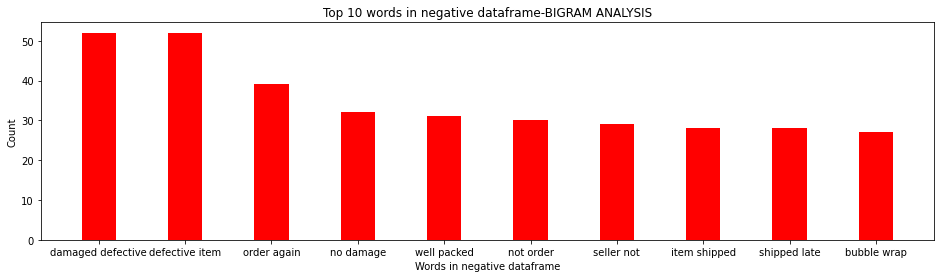

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)


In [ ]:
for text in dataset[dataset.label=='Positive'].feedback:
    for word in generate_N_grams(text,3):
        positiveValues3[word]+=1

['wala', 'parcel', 'huhu', 'eto', 'need', 'iisa', 'lang', 'order', 'hahaha', 'uki', 'ukishshsjsjjsbsbsbshjwjwjwjsjsjsjssjjdjdndndnxnxnxndbdbdsbsbsbsbsbsbdbdbdbdbdbdbxbxbxbbxbxbxbxbxbxbdb']
['di', 'sure', 'legit', 'un', 'items', 'kc', 'd', 'maayos', 'packaging']
['hahaha', 'maybe', 'only', 'used', 'nice']
['plant', 'stored', 'plastic', 'bag', 'without', 'air', 'inside', 'plastic', 'container', 'plant', 'arrived', 'leaves', 'already', 'unattached', 'slimmy', 'thank', 'plant', 'though', 'planted', 'roots', 'hoped', 'grow', 'again']
['ok', 'item', 'no', 'leak', 'no', 'crack', 'itry', 'sna', 'effective', 'looking', 'forward', 'bbli', 'pko', 'kpg', 'effective', 'un', 'exp', 'disat', 'delivery', 'dhl', 'sobrang', 'tgal', 'nnsa', 'hub', 'linggo', 'nsa', 'hub', 'mlpt', 'sken', 'd', 'dndeliver', 'anyway', 'slamat', 'seller', 'sna', 'effective', 'bbli', 'marami', 'ever']
['good', 'packaging', 'safe', 'good', 'condition', 'dumating', 'items', 'wala', 'order', 'maybe', 'nkalimutan', 'osmocote', 'ca

['super', 'sulit', 'price', 'fast', 'shipping', 'super', 'sulit', 'price', 'fast', 'shipping', 'super', 'sulit', 'price', 'fast', 'shipping', 'super', 'sulit', 'price', 'fast', 'shipping']
['thank', 'seller', 'bilis', 'shipping', 'nya']
['test', 'tomorrow', 'clean', 'aquarium', 'll', 'update', 'review', 'looks', 'ok', 'delivered', 'quick', 'mura', 'parang', 'cartimar', 'pricing', 'ok']
['galing', 'seller', 'safe', 'safe', 'pagkapacked', 'kumpleto', 'rekado', 'gumagana', 'xa', 'ky', 'seller', 'thank', 'marami', 'safe', 'delivery', 'kuya', 'rider']
['okay', 'packaging', 'karton', 'bubblewrap', 'okay', 'top', 'filter', 'malakas', 'gallons', 'hahaha', 'nadelay', 'lang', 'deliver', 'shopee', 'express', 'tumambay', 'hub', 'eh']
['serves', 'purpose', 'sobrang', 'happpyyyy', 'annnaaakkk', 'isda', 'nya', 'nalinisan', 'kc', 'gold', 'fish', 'hammer', 'head', 'fish', 'nya']
['packaged', 'arrived', 'time', 'perfect', 'conditioned', 'damage', 'whatsoever', 'didn', 'expect', 'motor', 'big', 'well', '

In [ ]:
for text in dataset[dataset.label=='Negative'].feedback:
    for word in generate_N_grams(text,3):
        negativeValues3[word]+=1

['deffective', 'item', 'seller', 'not', 'professional', 'wrong', 'move', 'dami', 'palang', 'bad', 'reviews', 'shop', 'nato', 'diko', 'nabasa', 'lesson', 'learned', 'review', 'muna', 'shop', 'item', 'buyyout']
['walang', 'dumating', 'gantong', 'item']
['damaged', 'defective', 'item']
['wlang', 'nalabas', 'co', 'buti', 'diy', 'diffuser']
['basag', 'poyung', 'dumating', 'aquaspeed', 'order', 'ibang', 'brand', 'dumating']
['pangit', 'nung', 'parts', 'nadumating', 'sira']
['kulang', 'dinidikit']
['tagal', 'ship', 'dumating']
['ordered', 'pcs', 'dumating', 'chatted', 'seller', 'yesterday', 'send', 'stone', 'crack', 'immedietly', 'held', 'see', 'vid', 'seller', 'doesn', 'response', 'yet', 'incident', 'got', 'dissapointed']
['scam', 'inorder', 'inch', 'quantity', 'dumating', 'sakin', 'inch', 'lang']
['uses', 'ayaw', 'gumana']
['not', 'receive', 'item']
['damaged', 'defective', 'item']
['disappointed', 'hindi', 'dumating', 'white', 'sand', 'worth', 'only', 'received', 'dragon', 'stone', 'imagin

In [ ]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))



In [ ]:
df_positive3.to_excel("frequent_positive_trigram.xlsx", index=False)
df_negative3.to_excel("frequent_negative_trigram.xlsx", index=False)

# Sample MVA. Bag of Words, Model Testing

In [ ]:
y = dataset['label']
x = dataset['feedback']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range=(1,3),min_df=1)

In [ ]:
train_vec = cv.fit_transform(x_train)
print(train_vec)

  (0, 3804)	1
  (0, 4097)	1
  (0, 9443)	1
  (0, 3805)	1
  (0, 4104)	1
  (0, 3806)	1
  (1, 42)	1
  (1, 22682)	1
  (1, 47)	1
  (2, 9443)	1
  (2, 7208)	1
  (2, 26126)	1
  (2, 17072)	1
  (2, 265)	1
  (2, 9538)	1
  (2, 7459)	1
  (2, 26135)	1
  (2, 17073)	1
  (2, 9546)	1
  (2, 7460)	1
  (2, 26136)	1
  (3, 19611)	1
  (3, 20512)	1
  (3, 19622)	1
  (4, 9443)	1
  :	:
  (3282, 17887)	1
  (3282, 19624)	1
  (3282, 23352)	1
  (3282, 19027)	1
  (3282, 7057)	1
  (3282, 2102)	1
  (3282, 2063)	1
  (3282, 5907)	1
  (3282, 13759)	1
  (3282, 27467)	1
  (3282, 1535)	1
  (3282, 19204)	1
  (3282, 17956)	1
  (3282, 26799)	1
  (3282, 6798)	1
  (3282, 24048)	1
  (3282, 27648)	1
  (3282, 19215)	1
  (3282, 665)	1
  (3282, 19558)	1
  (3282, 21411)	1
  (3282, 17842)	1
  (3282, 13210)	1
  (3282, 2608)	1
  (3282, 23342)	1


In [ ]:
cv.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aa rate',
 'aa rate amazon',
 'aagad',
 'aagad guppies',
 'aagad guppies sayang',
 'aagawan',
 'aagawan cla',
 'aagawan cla hahahaha',
 'aantay',
 'aantay response',
 'aapela',
 'aapela seller',
 'aapela seller nakakaya',
 'aareh',
 'aareh aquarium',
 'aareh aquarium nmin',
 'abcdefghijklmnopqrstuvwxyz',
 'abit',
 'abit late',
 'abit late find',
 'able',
 'able make',
 'able make work',
 'able take',
 'able take picture',
 'able use',
 'able use actual',
 'abot',
 'abot leeg',
 'abot leeg salamat',
 'acceptable',
 'acceptable not',
 'acceptable not fast',
 'accessories',
 'accessories filter',
 'accessories filter napadala',
 'accessories good',
 'accessories good gals',
 'accidentally',
 'accidentally broke',
 'accidentally broke pump',
 'accommodating',
 'accommodating resolve',
 'accommodating resolve fast',
 'accommodating selled',
 'accommodating selled well',
 'accommodating seller',
 'accommodating seller highly',
 'accommodating seller item',
 'accommodating seller ord

In [ ]:
cv.vocabulary_

{'damaged': 3804,
 'defective': 4097,
 'item': 9443,
 'damaged defective': 3805,
 'defective item': 4104,
 'damaged defective item': 3806,
 'accommodating': 42,
 'seller': 22682,
 'accommodating seller': 47,
 'good': 7208,
 'thumbs': 26126,
 'order': 17072,
 'again': 265,
 'item good': 9538,
 'good thumbs': 7459,
 'thumbs order': 26135,
 'order again': 17073,
 'item good thumbs': 9546,
 'good thumbs order': 7460,
 'thumbs order again': 26136,
 'poor': 19611,
 'quality': 20512,
 'poor quality': 19622,
 'well': 27791,
 'packaged': 17653,
 'shipped': 23518,
 'quickly': 20757,
 'well packaged': 27842,
 'packaged item': 17683,
 'item shipped': 9716,
 'shipped quickly': 23563,
 'well packaged item': 27856,
 'packaged item shipped': 17685,
 'item shipped quickly': 9720,
 'took': 26491,
 'long': 12269,
 'time': 26170,
 'deliver': 4159,
 'took long': 26503,
 'long time': 12283,
 'time deliver': 26211,
 'took long time': 26506,
 'long time deliver': 12284,
 'goods': 7488,
 'tong': 26473,
 'scrap

In [ ]:
bag_of_words = pd.DataFrame(train_vec.toarray(), columns=cv.get_feature_names())
bag_of_words

,aa,aa rate,aa rate amazon,aagad,aagad guppies,aagad guppies sayang,aagawan,aagawan cla,aagawan cla hahahaha,aantay,...,yyyyyyyyyyyyooooooooooooouuuuuuuuu nice,yyyyyyyyyyyyooooooooooooouuuuuuuuu nice product,zero,zero marks,zero marks transportation,zipper,zipper safely,zipper safely packed,zyxjvkcyzuvkfudufifudydywtscufystxicudydufidudif,ùuuuuuuuuuuu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_vec = cv.transform(x_test)
print(test_vec)

  (0, 3617)	1
  (0, 6761)	1
  (0, 6833)	1
  (0, 8105)	1
  (0, 11336)	1
  (0, 12942)	1
  (0, 13508)	1
  (0, 14410)	1
  (0, 14429)	1
  (0, 19752)	1
  (0, 21907)	1
  (0, 21919)	1
  (0, 21936)	1
  (0, 21937)	1
  (0, 21939)	1
  (0, 24929)	1
  (0, 24956)	1
  (0, 25482)	1
  (0, 28497)	1
  (1, 9014)	1
  (1, 9443)	1
  (1, 9716)	1
  (1, 9717)	1
  (1, 17653)	1
  (1, 17683)	1
  :	:
  (819, 8302)	1
  (819, 11932)	1
  (819, 13928)	1
  (819, 13940)	1
  (819, 15354)	1
  (819, 17011)	1
  (819, 17014)	1
  (819, 18383)	1
  (819, 18817)	1
  (819, 22104)	1
  (819, 24929)	2
  (819, 24969)	1
  (819, 25893)	1
  (819, 26077)	1
  (819, 26784)	1
  (819, 26920)	1
  (819, 26936)	1
  (819, 27025)	1
  (819, 27791)	1
  (820, 25614)	1
  (820, 25631)	1
  (820, 26608)	1
  (820, 27791)	1
  (820, 28254)	1
  (820, 28284)	1


# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [ ]:
mn.fit(train_vec,y_train)

MultinomialNB()

In [ ]:
pred=mn.predict(test_vec)

In [ ]:
pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral',
       'Positive', 'Neutral', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
 

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
naive_accuracy = accuracy_score(y_test,pred)
naive_precision = precision_score(y_test,pred,average='macro')
naive_recall = recall_score(y_test,pred,average='macro')
naive_f1 = f1_score(y_test,pred,average='macro')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  


In [ ]:
decision_tree= DecisionTreeClassifier()

In [ ]:
decision_tree.fit(train_vec,y_train)

DecisionTreeClassifier()

In [ ]:
pred = decision_tree.predict(test_vec)

In [ ]:
tree_accuracy = accuracy_score(y_test,pred)
tree_precision = precision_score(y_test,pred,average='macro')
tree_recall = recall_score(y_test,pred,average='macro')
tree_f1 = f1_score(y_test,pred,average='macro')

# Support vector classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm= SVC()  
svm.fit(train_vec, y_train)  

SVC()

In [ ]:
pred = svm.predict(test_vec)

In [ ]:
svc_accuracy = accuracy_score(y_test,pred)
svc_precision = precision_score(y_test,pred,average='macro')
svc_recall = recall_score(y_test,pred,average='macro')
svc_f1 = f1_score(y_test,pred,average='macro')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  

In [ ]:
logistic= LogisticRegression(multi_class='multinomial',random_state=0)  
logistic.fit(train_vec, y_train)  

LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
pred= logistic.predict(test_vec)

In [ ]:
logistic_accuracy = accuracy_score(y_test,pred)
logistic_precision = precision_score(y_test,pred,average='macro')
logistic_recall = recall_score(y_test,pred,average='macro')
logistic_f1 = f1_score(y_test,pred,average='macro')

In [ ]:
xpred = logistic.predict(train_vec)

In [ ]:
print(accuracy_score(y_train,xpred))

0.9987816021931161


In [ ]:
xtest =pd.DataFrame(data = x_test)
xtest['ytest'] = y_test

xtest


,feedback,ytest
4376,ganda saktong sakto lang gallons tanks maliwan...,Positive
1549,well packaged item shipped immediately,Positive
2559,thank seller product great panalo ganda madami...,Positive
1640,happy everything bought shop seller responsive...,Positive
4697,complete npaka accomodating seller shipping ba...,Negative
...,...,...
1243,salamat seller uulitin order item shipped imme...,Positive
2804,nice one ganda malaki pla xa thougth small hah...,Positive
2631,super duper legit seller thank much seller,Positive
3500,alive alive well rooted free though meron leav...,Positive


In [ ]:
xtest['Predicted'] = pred
xtest

,feedback,ytest,Predicted
4376,ganda saktong sakto lang gallons tanks maliwan...,Positive,Positive
1549,well packaged item shipped immediately,Positive,Positive
2559,thank seller product great panalo ganda madami...,Positive,Positive
1640,happy everything bought shop seller responsive...,Positive,Positive
4697,complete npaka accomodating seller shipping ba...,Negative,Negative
...,...,...,...
1243,salamat seller uulitin order item shipped imme...,Positive,Positive
2804,nice one ganda malaki pla xa thougth small hah...,Positive,Positive
2631,super duper legit seller thank much seller,Positive,Positive
3500,alive alive well rooted free though meron leav...,Positive,Positive


In [ ]:
neutral= xtest['Predicted'].value_counts()['Neutral']
negative= xtest['Predicted'].value_counts()['Negative']
positive= xtest['Predicted'].value_counts()['Positive']

In [ ]:
negative

165

In [ ]:
neutral

105

In [ ]:
positive

551

# Model Metrics

In [ ]:
model_metrics = {'Model': ['Multinomial Naive Bayes','Decision Tree', 'Support Vector Machine', 'Logistic Regression'], 'Accuracy Score':[naive_accuracy,tree_accuracy,svc_accuracy,logistic_accuracy],'Precision':[naive_precision, tree_precision, svc_precision, logistic_precision],'Recall':[naive_recall,tree_recall,svc_recall,logistic_recall],'F1 Score':[naive_f1,tree_f1,svc_f1,logistic_f1]}

model_metrics = pd.DataFrame(data= model_metrics)
model_metrics

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Multinomial Naive Bayes,0.856273,0.917860,0.687895,0.728608
1,Decision Tree,0.878197,0.842090,0.813923,0.826164
2,Support Vector Machine,0.880633,0.884885,0.770808,0.813015
3,Logistic Regression,0.907430,0.869969,0.847848,0.857758


# Sample future data

In [ ]:
data_test = pd.read_excel('data_test.xlsx')

In [ ]:
data_test

,username,date,product,rating,feedback_auto,feedback
0,kyliegriego,2022-02-11 09:05:00,aquarium airpump connector controller,1.0,NaN,Walang kwenta
1,salvatierraaldrin,2022-02-09 13:08:00,"co2 diffuser set (checkvalve, ushape, diffuser...",1.0,Damaged / Defective item,Panget ni karl
2,veronicango_,2022-01-18 09:29:00,"aquarium background sticker oyama 24"" height s...",1.0,NaN,Maganda naman
3,marcpesquira,2022-01-11 07:48:00,aquarium airpump connector controller,1.0,Did not receive item,Gumagana
4,jdbatallones,2022-01-08 13:24:00,dragon stone black seiryu stone ryou stone cru...,1.0,NaN,Maayos
5,waterelementz,2022-01-05 18:36:00,infinity slim external hang on filter cs48 cs3...,1.0,Will not order again,Nice quality
6,a*****a,2022-01-03 03:59:00,aquaspeed aquarium heater 25w 50w 100w 200w 300w,1.0,Will not order again,Mahina di gumagana
7,zyzylikz,2021-12-30 15:41:00,aquarium airpump connector controller,1.0,NaN,Ayos ang product
8,ivyjoydelrosario,2021-12-22 08:47:00,airstone cylinder big round 1inch 2.5inch air ...,1.0,NaN,Basag ang salamin
9,asdasd,2021-12-22 08:47:00,airstone cylinder big round 1inch 2.5inch air ...,1.0,NaN,Kulang ng bato


In [ ]:
sample_data = [getCleanText(i) for i in data_test['feedback']]


In [ ]:
sample_test = cv.transform(sample_data)


In [ ]:
pred= logistic.predict(sample_test)
pred

array(['Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Neutral', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Neutral'], dtype=object)